# Introduction
>In the following code I am going to wrangle and the clean data provided by kaggle concerning no-show appointments and the features that may effect the statistic.

The aim of this analysis is to find the most significant featurs for determinig the no-show status of patients. 

>Paticularly I will look at:
- the effect of sending out sms messages to patients as this can certainly be controlled by the doctors. 
- I will look within other catorgorical variabls to see if this relationship is consistent throughout the dataset

>I will also as a matter of interest use the data set to explore the relationship between:
- age and no_show
- age and alcoholism
- neighbourhood and no-show 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
base_color = sb.color_palette()[0]
bar_color = sb.color_palette("Paired")

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.replace(['No','Yes'], [0,1], inplace=True)

>I am doing this so that I can these values numerically with functions such as mean()

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show             int64
dtype: object

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>Here I can see that we do not have a problem with null vlaues in our dataframe

### Data Cleaning
>Here I will replace whie spaces with an underscore.

In [9]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

>This makes the headers much more simply to code and removes the need for quotation marks in many instances.

In [10]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


>Next I correct a number of spelling misakes in the column headers. 

In [11]:
df.rename(columns={'patientid': 'patient_id'}, inplace=True)
df.rename(columns={'appointmentid': 'appointment_id'}, inplace=True)
df.rename(columns={'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentday': 'appointment_day'}, inplace=True)

df.rename(columns={'handcap': 'handicap'}, inplace=True)
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)
df.rename(columns={'no-show': 'no_show'}, inplace=True)

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

>Here below I am going to plot histograms for each numeric value. This will help me see the distribution of the dataset and I can also observe where limitations may be present:

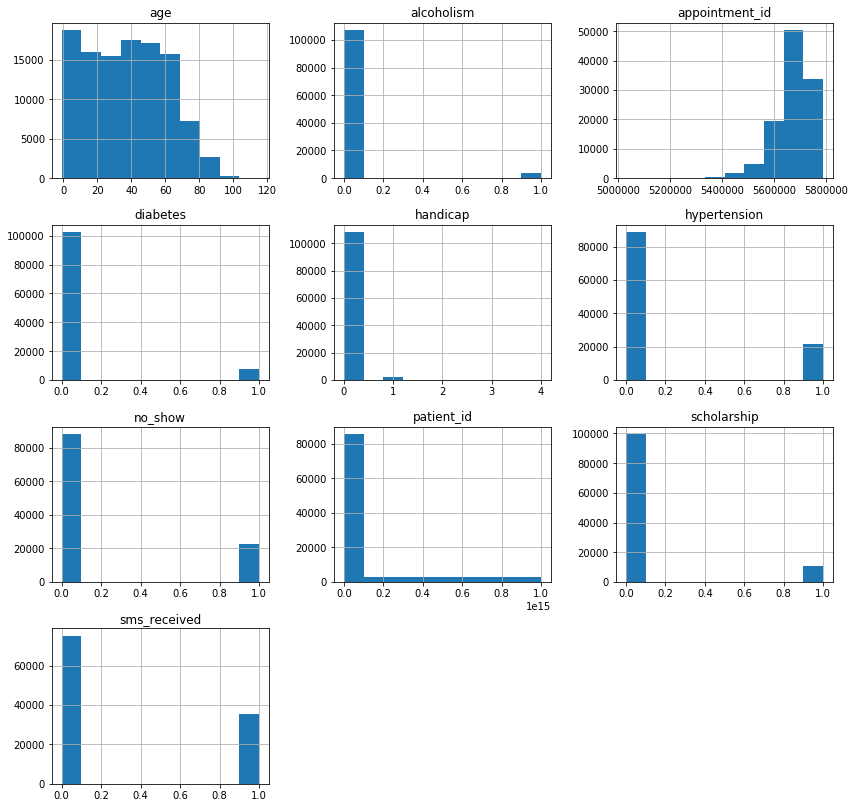

In [12]:
df.hist(figsize=(14,14));

##### Here I am checking how many people who received the sms message showed up to their appointment

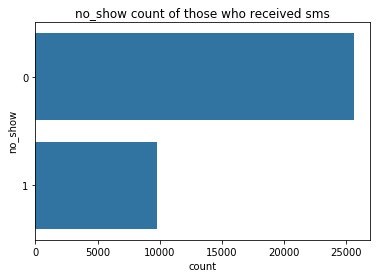

In [13]:
df_sms = df[df['sms_received']==1]


counts = df_sms['no_show'].value_counts()
order = counts.index
plt.title('no_show count of those who received sms')
sb.countplot(data = df_sms, y = 'no_show', order = order, color=base_color);

##### Here I am checking how many people who did not received the sms message showed up to their appointment

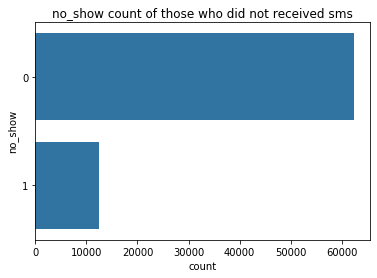

In [14]:
df_sms = df[df['sms_received']==0]


counts = df_sms['no_show'].value_counts()
order = counts.index
plt.title('no_show count of those who did not received sms')
sb.countplot(data = df_sms, y = 'no_show', order = order, color=base_color);

>In the above two countplot we can see that to many more people who did not recieve the text message did show up to their appointments than those who did receive the text. Of course more people did not receive the text so this is to be expected however the proprtions from the above visualisations also make it clear that patients are more likely to show up whent they did not receive the text message. This is suprising and I will want to quantify this later.

##### In the following two scatterplots I am going to explore:
- age and no_show
- age and alcoholism 

>Before I can do this I have to group teh dataframne by age and generate the mean of these groups which I do in the cell directly below.

In [15]:
df.groupby(['age']).mean().reset_index()

,age,patient_id,appointment_id,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-1,4.659432e+14,5.775010e+06,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0,1.539027e+14,5.671375e+06,0.014693,0.0,0.000000,0.0,0.000283,0.253461,0.180559
2,1,1.580224e+14,5.678714e+06,0.036076,0.0,0.000440,0.0,0.000440,0.249010,0.182578
3,2,1.437773e+14,5.681502e+06,0.073548,0.0,0.000618,0.0,0.000618,0.242892,0.155748
4,3,1.447703e+14,5.678064e+06,0.089888,0.0,0.000000,0.0,0.000000,0.267019,0.183080
...,...,...,...,...,...,...,...,...,...,...
99,98,9.213857e+13,5.564189e+06,0.000000,1.0,0.333333,0.0,0.000000,0.333333,0.166667
100,99,3.661577e+10,5.775674e+06,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.000000
101,100,1.891399e+13,5.721921e+06,0.000000,0.0,0.000000,0.0,0.500000,0.250000,0.000000
102,102,4.882645e+14,5.701660e+06,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


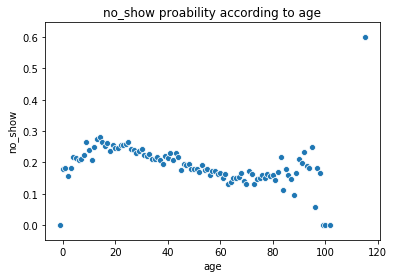

In [16]:
plt.title('no_show proability according to age')
sb.scatterplot(data=df.groupby(['age']).mean().reset_index(), x='age', y="no_show")

>Here we can see the variations with no-shows depending on age. Where no shows peak at  proability of around 30% in late teens and then slowlet get less and less occurent until older ag, 80+, where they start to become more likely again. 

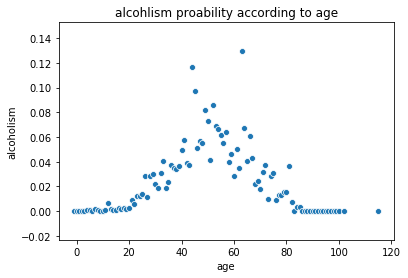

In [17]:
plt.title('alcohlism proability according to age')
sb.scatterplot(data=df.groupby(['age']).mean().reset_index(), x='age', y="alcoholism")

>This scatter plot depicts the prevalance of alcoholism amoungst our dataset. Clearly most prevalent between the ages of 30-70. 

##### Now I am going to explore:
- neighbourhood and no-show

>To do this I will use the same method as above.

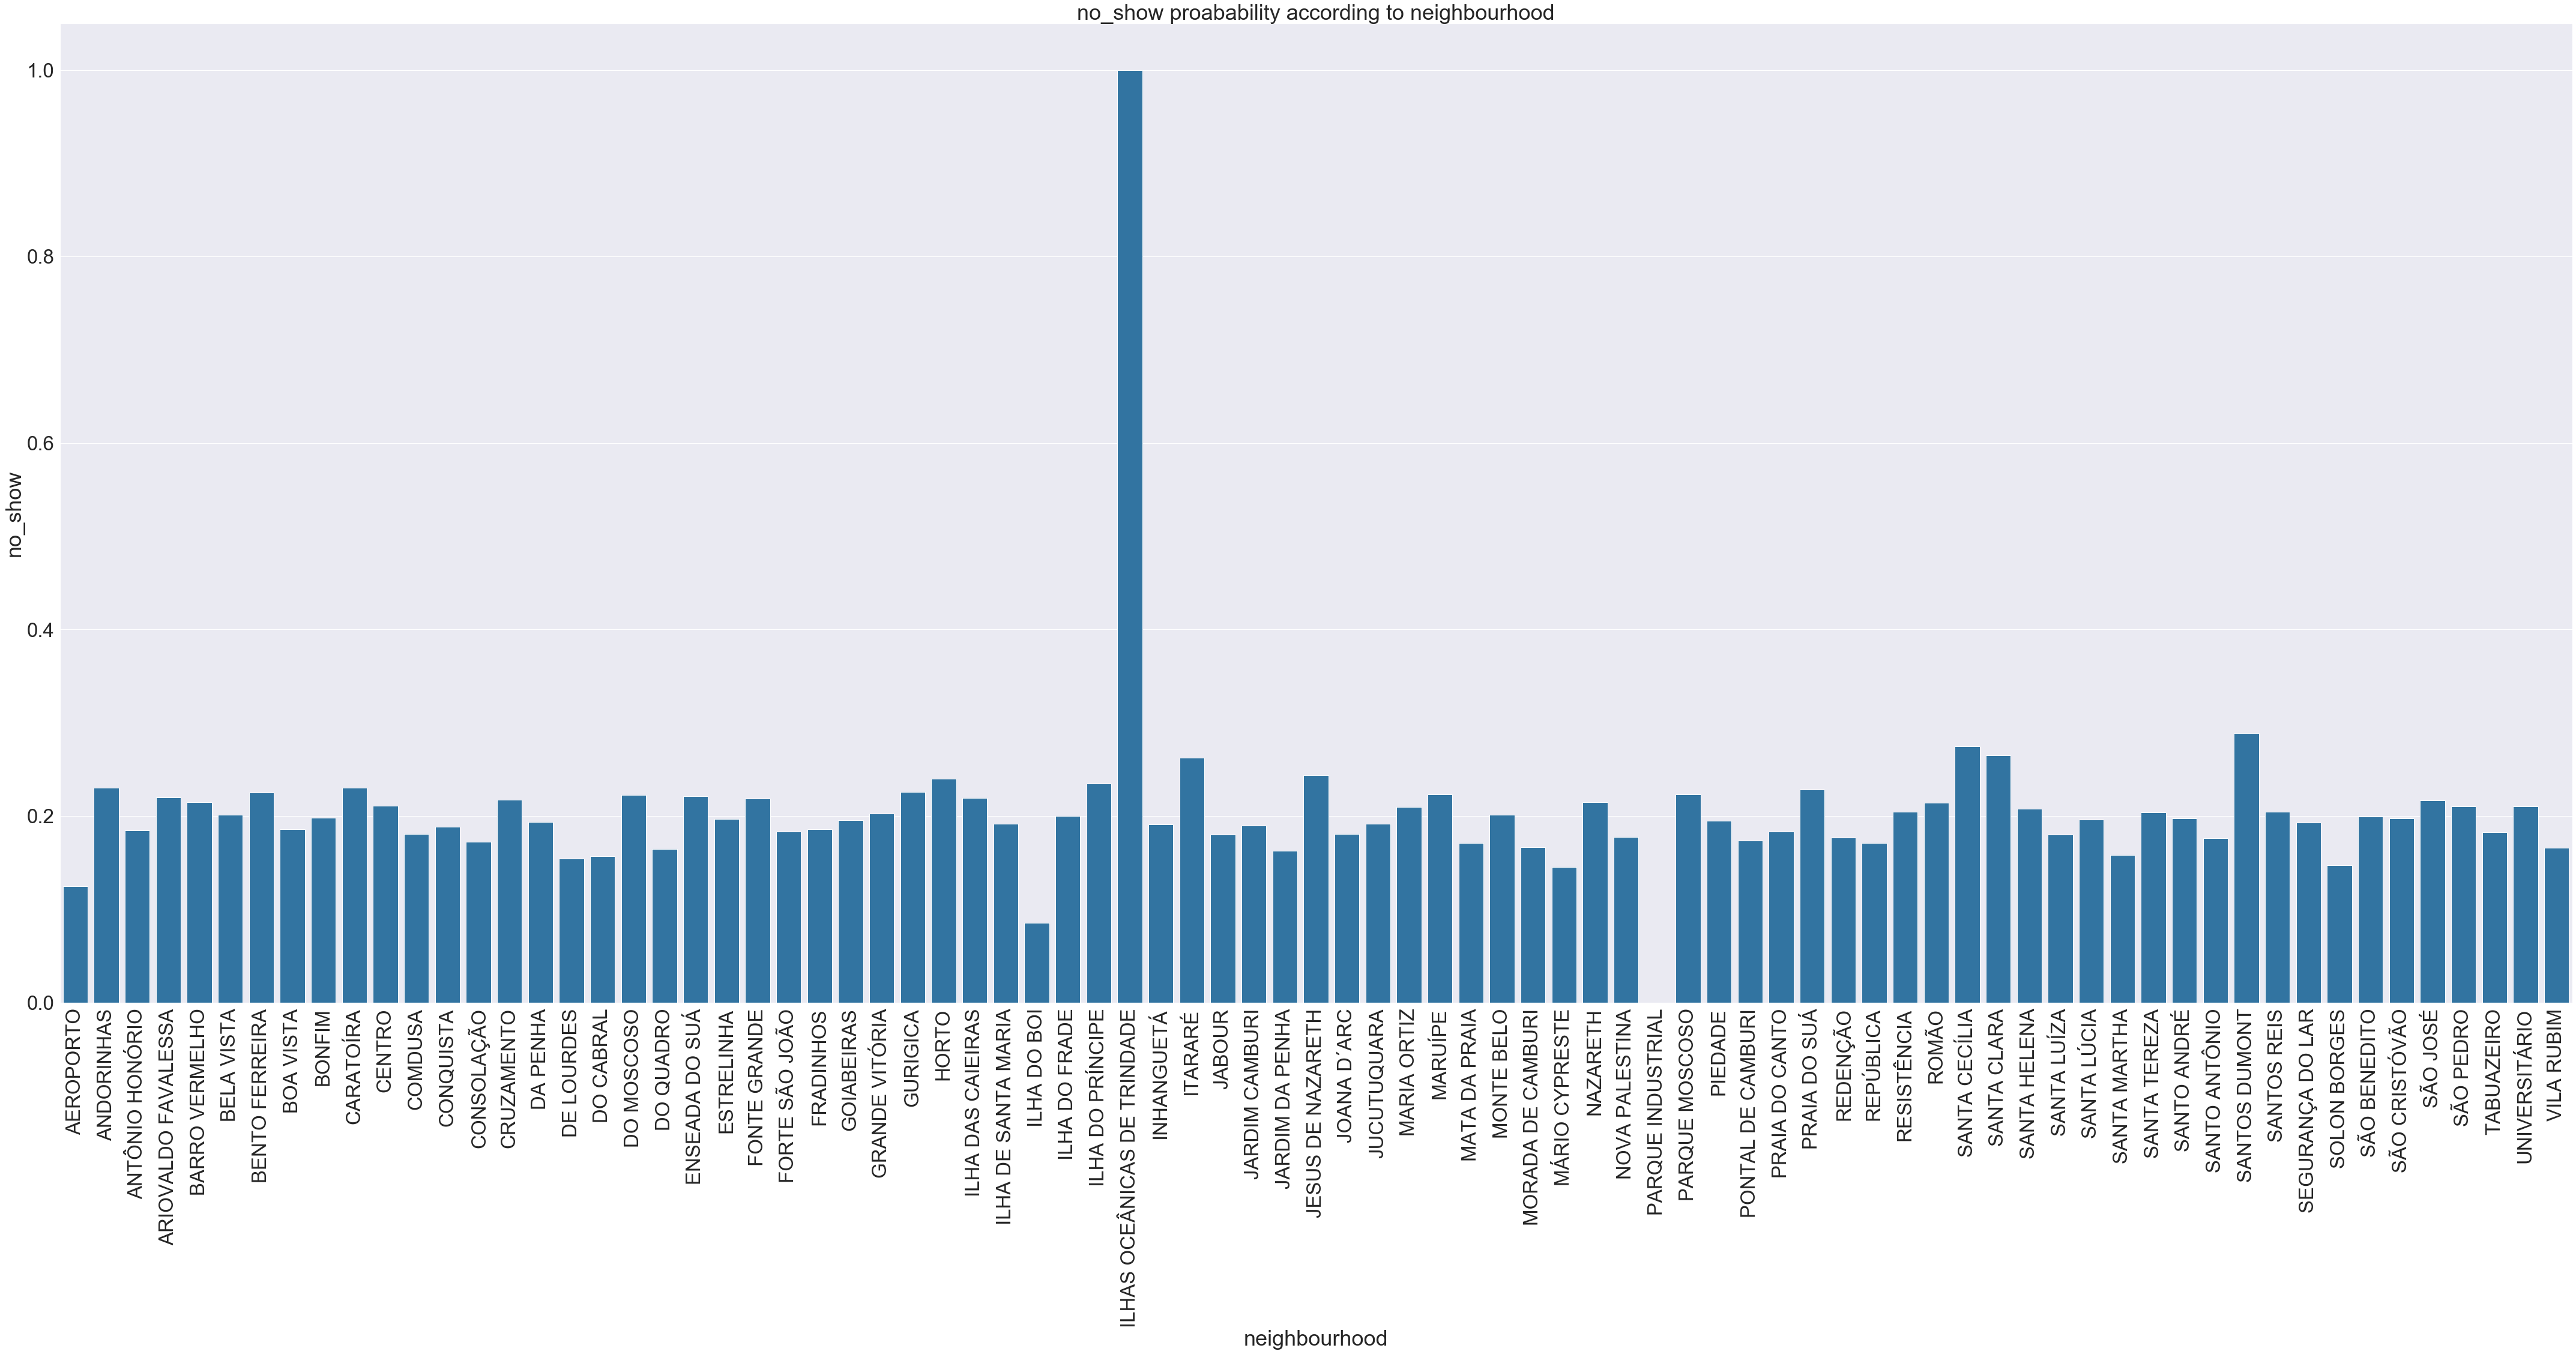

In [18]:
plt.figure(figsize=(75, 30))
sb.set(font_scale=3)
plt.xticks(rotation=90);
plt.title('no_show proabability according to neighbourhood')
sb.barplot(data=df.groupby(['neighbourhood']).mean().reset_index(),
           x='neighbourhood', y='no_show', color=base_color);


>Here I can see that ILHAS OCEANICAS DE TRINDADE has a 100% no show rate. I will now cehck how many inputs we have for this neighborhood, I suspect very low

In [19]:
df[df['neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
48754,5.349869e+11,5583947,F,2016-04-14 12:25:43+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1
48765,7.256430e+12,5583948,F,2016-04-14 12:26:13+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1


>When we look we can see two patients in this area both who did not show up, this can be considered an outlier in our data considering the 62227 patients we have in other neighbourhoods all  of whom as neighbourhoods have no_show proabilities <0.3

### Analyse

##### Here I am going to start to analyse the relationship between the sms message and no shows

>Now I am going to create a class that will calculate the probability with which patients no show whilst controllling for one feature at a time

In [20]:
def get_pct_diff(df, column):
    
    df_column = df[df[column] == 1]
    column_pct = df_column['no_show'].mean()
    
    df_ncolumn = df[df[column] == 0]
    ncolumn_pct = df_ncolumn['no_show'].mean()
    
    return column_pct, ncolumn_pct

In [21]:
get_pct_diff(df, 'sms_received')

(0.27574544839637, 0.16703311346525418)

In [22]:
get_pct_diff(df, 'scholarship')

(0.2373630420771568, 0.19807155900708365)

In [23]:
get_pct_diff(df, 'handicap')

(0.1792360430950049, 0.20235302809227415)

In [24]:
get_pct_diff(df, 'hypertension')

(0.17301958625751113, 0.20903680995424115)

In [25]:
get_pct_diff(df, 'diabetes')

(0.18003273322422259, 0.20362824612025268)

In [26]:
get_pct_diff(df, 'alcoholism')

(0.20148809523809524, 0.20194649472318904)

>From the above calculations we can see that the rate of show is fairly equal when controlling for 5 of the 6 variables above. Only whether or
not the patient recieves the text has any significant impact on the probability of a no show. Suprisingly the paitent is much more likely to not show up if they recieve the text. 27.57% of those who received the text did not shw up whilst only 16.7% of those who did not receive the text did not show up. 

>Note: The first number in each tuple represents the proability that  the patient will not show up whn the variable in question is present. The second number in each tuple (value of variable = 0) represents the proability that the patient will not show up when the variableis not present. 

### Analyse Further

##### Now I am going to look within certain other catergorical variables and find out whether this postive relationship between the receipt of the sms message and no-show in cionsistent within each of the other catergorical variables. 
>Here I am going to create a class that can show me the effects of text message receipt within the other features. 

In [27]:
sms = df[df['sms_received'] == 1]
nsms = df[df['sms_received'] == 0]


In [28]:
def no_show_mean(column):
    y = sms.groupby(column).no_show.mean()
    n = nsms.groupby(column).no_show.mean()
    return y, n

In [29]:
no_show_mean('alcoholism')

(alcoholism
 0    0.274491
 1    0.327037
 Name: no_show, dtype: float64,
 alcoholism
 0    0.167305
 1    0.159172
 Name: no_show, dtype: float64)

>The first result tells us that out of those who received the text message, those who are alcoholics are more likely to not show up than those who are not alcoholics.

>Whilst in the second result we can see that out of those who did not receive the text alcholics and non-alcoholics where equally likely to not show up and at a much lesser rate than the group who did receive the message.



In [30]:
no_show_mean('scholarship')

(scholarship
 0    0.268943
 1    0.337803
 Name: no_show, dtype: float64,
 scholarship
 0    0.164591
 1    0.189505
 Name: no_show, dtype: float64)

>These results show us a similar trend to the one above which is that those who receive the text a less likely to show up to appointments within the feature in question, namely whether or not the patient has a scholarship.

In [31]:
no_show_mean('diabetes')

(diabetes
 0    0.278935
 1    0.230900
 Name: no_show, dtype: float64,
 diabetes
 0    0.167713
 1    0.158582
 Name: no_show, dtype: float64)

>The trend observed in both scholarship and alcoholism is continued here.

In [32]:
no_show_mean('hypertension')

(hypertension
 0    0.287956
 1    0.224891
 Name: no_show, dtype: float64,
 hypertension
 0    0.171474
 1    0.149153
 Name: no_show, dtype: float64)

>Here although the trend is similar in the sense that those who receive the text are still more likely to not show up to appointments we can see here that within the group that do receive the text more who do not have hypertension show up than dont, this is in contrast to the previous three examples.

In [33]:
no_show_mean('handicap')

(handicap
 0    0.276112
 1    0.257669
 2    0.162791
 3    0.333333
 4    1.000000
 Name: no_show, dtype: float64,
 handicap
 0    0.167208
 1    0.154540
 2    0.214286
 3    0.200000
 4    0.000000
 Name: no_show, dtype: float64)

In [34]:
no_show_mean('handicap')

(handicap
 0    0.276112
 1    0.257669
 2    0.162791
 3    0.333333
 4    1.000000
 Name: no_show, dtype: float64,
 handicap
 0    0.167208
 1    0.154540
 2    0.214286
 3    0.200000
 4    0.000000
 Name: no_show, dtype: float64)

In [35]:
df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

>With a different rating system from the previous 4 features the handicap section is a litter more difficult to draw conclusions from. We can practically ignore 4,3 and possible 2 in terms of scope as we have few patients with these conditions. As for 0 and 1 ratings again when sent the text patients are much less likely to attend the appointment (27.6% and 25.7% respectively) whilst much more likely when they do not receive the text (16.7% and 15.5% respectively). 

# Conclusion

In conclusion the main thrust of my analysis has led me to the conclusion that those patients that receive the text message are less likey to turn up to hospital appointments. This relationship is consistent within each of the other catergorical variables as well. Therefore I think it would be fair enough to reccomend to the hospital to stop sending sms messages in order to minimise the number of no-shows. 

In terms of my exploratory investigations other than the above I also found that:
- no shows peak at  proability of around 30% in late teens and then slowlet get less and less occurent until older ag, 80+, where they start to become more likely again
- alcohiolism is more prevalent between the ages of 30-70. 

##### Limitations

Of course we are only dealing with 62299 patients out of a posssibly much larger population, however out of the dataset that we do have we have no issue with null values. We do havge a limitations in the sense that a lot of the catergorical values are very unevenly representaitve, this is paticulary true for handicap as I cam across in the last part of further analysis section with value counts of: 

0    108286
1      2042
2       183
3        13
4         3 

I also came across a limitation when analysing the proability of no-show within neighbourhoods, when one clear outlier, ILHAS OCEANICAS DE TRINDADE, had a 100% no_show rate and so in turn I found out that there were only two values present for this neighbourhood. 

